# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

Assignació: Marc RR, Jordi

## Anàlisi de Sèries Temporals

### Importació de Llibreries

In [67]:
PACKAGES = ["pandas", "matplotlib", "numpy", "dayplot"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import os
import importlib
import sys
sys.path.append('../mobicat_python_utils')

import utils
importlib.reload(utils)
utils.install_missing_packages(PACKAGES)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import dayplot as dp

import IPython.display 
IPython.display.clear_output()

### Importació de Dades de Mobilitat de Mostra

**Important**: posa al directori *test-data* els següents fitxers, o canvia el directori pel directori amb els fitxers. 
```bash
    movilidad_barrios_2023-01_origen.csv
    movilidad_municipios_2023-01_origen.csv
    movilidad_mun_barrios_2023-01_origen.csv
```

In [43]:
directory = "./test-data/"
file_name = "movilidad_municipios_2023-01_origen.csv"
file_path = os.path.join(directory, file_name)

df = pd.read_csv(file_path, dtype=str)
df["viajes"] = df["viajes"].astype("int32")
df["day"] = pd.to_datetime(df["day"])
df_zeros_filtered = df[df["viajes"] > 0]

display(df_zeros_filtered.head(5))
print(df_zeros_filtered.shape)

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes
4,2023-01-01,Domingo,01,Regional,08001,Abrera,08015,Badalona,52
7,2023-01-01,Domingo,01,Regional,08001,Abrera,08019,Barcelona,324
8,2023-01-01,Domingo,01,Nacional,08001,Abrera,08019,Barcelona,34
9,2023-01-01,Domingo,01,Internacional,08001,Abrera,08019,Barcelona,87
10,2023-01-01,Domingo,01,Residente,08001,Abrera,08019,Barcelona,475


(508839, 9)


### Importació de les Dades de Viatges per Dia

In [ ]:
all_datasets_directory = r"F:\mobile_challenge_telefonica\output_limite_legal"

file_name_day = r"movilidad_municipios_por_dia.csv"
file_path_day = os.path.join(directory, file_name_day)

concatenated_day_df = pd.DataFrame()
try:
    concatenated_day_df = pd.read_csv(file_path_day)
except:
    concatenated_day_df = utils.group_by_day_full_datasets(all_datasets_directory)    
    concatenated_day_df.drop(columns="month").to_csv(file_path_day, index=False)

concatenated_day_df["day"] = pd.to_datetime(concatenated_day_df["day"])
display(concatenated_day_df.head(5))
print(concatenated_day_df.shape)

,day,day_of_week,viajes
0,2023-01-01,Domingo,2169439
1,2023-01-02,Lunes,3465322
2,2023-01-03,Martes,3671647
3,2023-01-04,Miércoles,3917849
4,2023-01-05,Jueves,3600172


(971, 3)


In [55]:
file_name_monthly = r"movilidad_municipios_por_mes.csv"
file_path_monthly = os.path.join(directory, file_name_monthly)
try:
    year_month_df = pd.read_csv(file_path_monthly)
except:
    year_month_df = concatenated_day_df.groupby(by=["year", "month"])["viajes"].sum().reset_index()
    year_month_df.to_csv(file_path_monthly, index=False)

display(year_month_df.head(5))
print(year_month_df.shape)

,year,month,viajes
0,2023,1,107056918
1,2023,2,103173026
2,2023,3,123881482
3,2023,4,109876694
4,2023,5,121837337


(32, 3)


In [ ]:
week_color_df = utils.get_week_color()

concatenated_color_week_df = concatenated_day_df.join(
    other=week_color_df.set_index("day_of_week"),
    on="day_of_week"
)

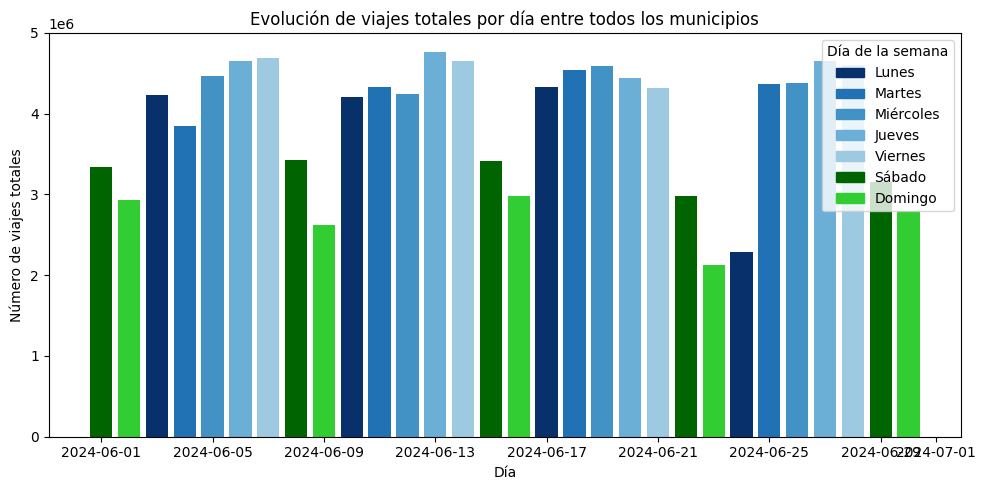

In [65]:
day_filtered_df = utils.filter_by_year_month(concatenated_color_week_df, year=2024, month=6)

plt.figure(figsize=(10, 5))
plt.bar(day_filtered_df["day"], day_filtered_df["viajes"], color=day_filtered_df["day_of_week_color"])
plt.title('Evolución de viajes totales por día entre todos los municipios')
plt.xlabel('Día')
plt.ylabel('Número de viajes totales')
plt.tight_layout()

handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in week_color_df["day_of_week_color"]]
plt.legend(handles, week_color_df["day_of_week"], title="Día de la semana")

plt.show()

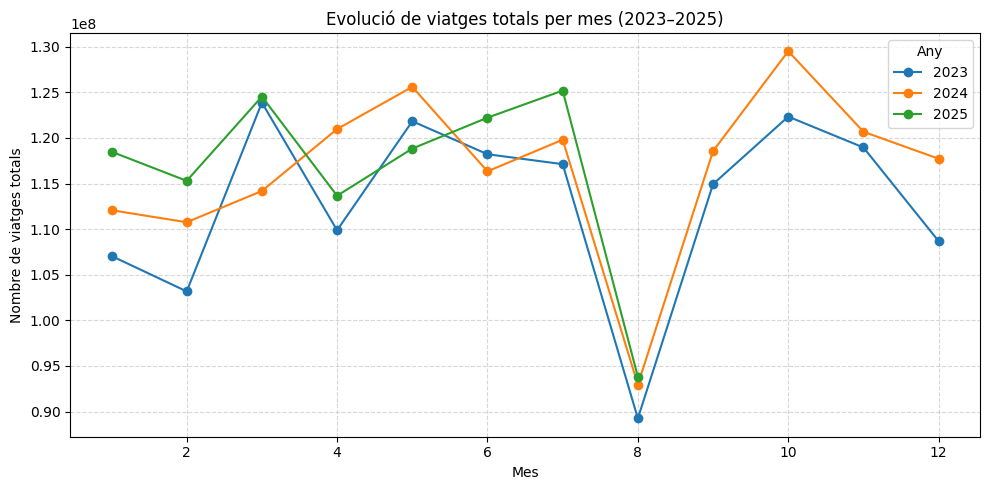

In [61]:
plt.figure(figsize=(10, 5))

for year in year_month_df["year"].unique():
    df_filtrat = year_month_df[year_month_df["year"] == year]
    plt.plot(df_filtrat["month"], df_filtrat["viajes"], marker='o', label=str(year))

plt.title('Evolució de viatges totals per mes (2023–2025)')
plt.xlabel('Mes')
plt.ylabel('Nombre de viatges totals')
plt.legend(title="Any")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

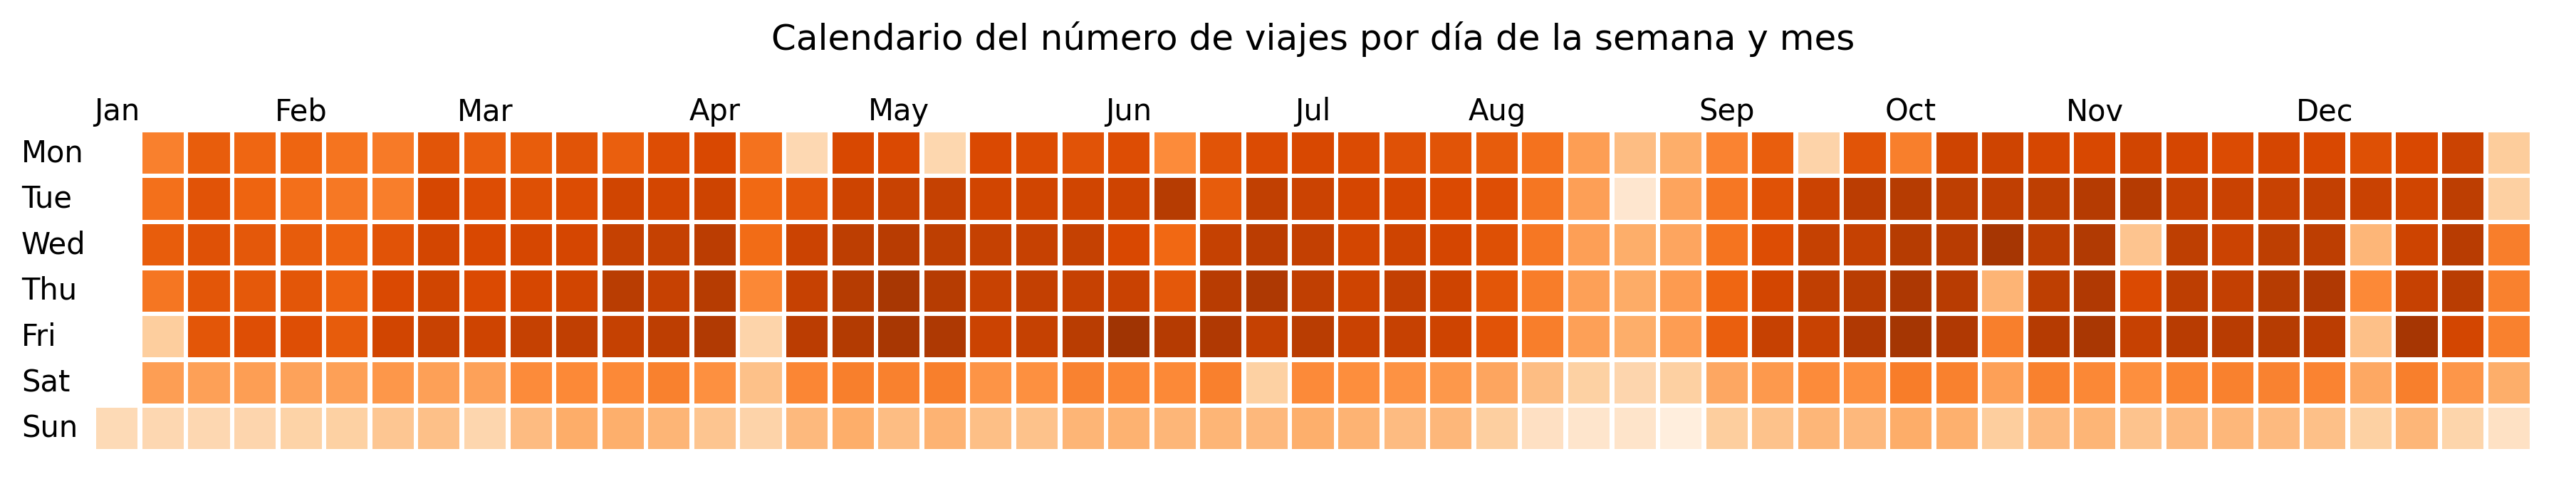

In [69]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=300)

dp.calendar(
    dates=concatenated_day_df["day"],
    values=concatenated_day_df["viajes"],
    start_date="2023-01-01",
    end_date="2023-12-31",
    ax=ax,
    cmap="Oranges",
    week_starts_on="Monday"
)
plt.title("Calendario del número de viajes por día de la semana y mes\n")
plt.show()

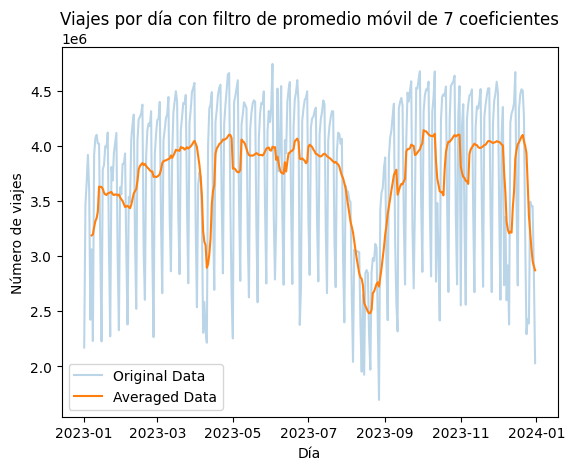

In [68]:
day_filtered_df = utils.filter_day_by_year(concatenated_color_week_df, year=2023)

num_coefficients = 7
day_average_df = pd.DataFrame()
day_average_df["day"] = day_filtered_df["day"]
day_average_df["viajes"] = day_filtered_df["viajes"].rolling(num_coefficients).mean()
plt.plot(day_filtered_df["day"], day_filtered_df["viajes"], label="Original Data", alpha=0.3)
plt.plot(day_average_df["day"], day_average_df["viajes"], label="Averaged Data")
plt.title(f"Viajes por día con filtro de promedio móvil de %d coeficientes" % num_coefficients)
plt.xlabel("Día")
plt.ylabel("Número de viajes")
plt.legend()
plt.show()